<a href="https://colab.research.google.com/github/Petar-GIT/Research-methods/blob/main/INL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDE efficiency experiment

We have 10 programmers who are randomly assigned so they can evaluate two IDE-s. They have been assigned to independently develop Prog-1 and Prog-2 only using either IDE-A or IDE-B.

Now that experiment has been concluded and we got the data we need to log it into the system and analyze it to draw a conclusiona and either prove or disprove the original hypothesis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_rel
import seaborn as sns

# Provided deisgn of the experiment
design = {
    'Programmer': range(1, 11),
    'Using_IDE_A': ['Prog-1', 'Prog-2', 'Prog-1', 'Prog-1', 'Prog-2',
                  'Prog-2', 'Prog-1', 'Prog-2', 'Prog-1', 'Prog-2'],
    'Using_IDE_B': ['Prog-2', 'Prog-1', 'Prog-2', 'Prog-2', 'Prog-1',
                  'Prog-1', 'Prog-2', 'Prog-1', 'Prog-2', 'Prog-1']
}



# Provided data for the experiment
data = {
    'Programmer': range(1, 11),
    'Prog1_Time': [104, 102, 159, 168, 150, 151, 111, 105, 137, 124],
    'Prog2_Time': [71.3, 110, 178, 153, 120, 174, 94.9, 86.1, 115, 175]
}
# We are putting the data that we have into a dataframe
df_design = pd.DataFrame(design)
df_data = pd.DataFrame(data)

# Now we are merging the dataframes into one that we will be using
df = pd.merge(df_design, df_data, on='Programmer')



In [3]:
# Showing the dataset dataframe
print("Dataset:")
print(df_data)

Dataset:
   Programmer  Prog1_Time  Prog2_Time
0           1         104        71.3
1           2         102       110.0
2           3         159       178.0
3           4         168       153.0
4           5         150       120.0
5           6         151       174.0
6           7         111        94.9
7           8         105        86.1
8           9         137       115.0
9          10         124       175.0


In [4]:
# Showing the design dataframe
print("Design:")
print(df_design)

Design:
   Programmer Using_IDE_A Using_IDE_B
0           1      Prog-1      Prog-2
1           2      Prog-2      Prog-1
2           3      Prog-1      Prog-2
3           4      Prog-1      Prog-2
4           5      Prog-2      Prog-1
5           6      Prog-2      Prog-1
6           7      Prog-1      Prog-2
7           8      Prog-2      Prog-1
8           9      Prog-1      Prog-2
9          10      Prog-2      Prog-1


In [5]:
# Showing the merged dataframe
print("Merged dataset with the deisgn:")
print(df)

Merged dataset with the deisgn:
   Programmer Using_IDE_A Using_IDE_B  Prog1_Time  Prog2_Time
0           1      Prog-1      Prog-2         104        71.3
1           2      Prog-2      Prog-1         102       110.0
2           3      Prog-1      Prog-2         159       178.0
3           4      Prog-1      Prog-2         168       153.0
4           5      Prog-2      Prog-1         150       120.0
5           6      Prog-2      Prog-1         151       174.0
6           7      Prog-1      Prog-2         111        94.9
7           8      Prog-2      Prog-1         105        86.1
8           9      Prog-1      Prog-2         137       115.0
9          10      Prog-2      Prog-1         124       175.0


In [6]:
df['IDE_A_TIME'] = df.apply(lambda row: row['Prog1_Time'] if row['Using_IDE_A']=='Prog-1' else row['Prog2_Time'], axis=1)
df['IDE_B_TIME'] = df.apply(lambda row: row['Prog1_Time'] if row['Using_IDE_B']=='Prog-1' else row['Prog2_Time'], axis=1)
print("Now we are adding which programmer used which IDE:")
print(df)

Now we are adding which programmer used which IDE:
   Programmer Using_IDE_A Using_IDE_B  Prog1_Time  Prog2_Time  IDE_A_TIME  \
0           1      Prog-1      Prog-2         104        71.3       104.0   
1           2      Prog-2      Prog-1         102       110.0       110.0   
2           3      Prog-1      Prog-2         159       178.0       159.0   
3           4      Prog-1      Prog-2         168       153.0       168.0   
4           5      Prog-2      Prog-1         150       120.0       120.0   
5           6      Prog-2      Prog-1         151       174.0       174.0   
6           7      Prog-1      Prog-2         111        94.9       111.0   
7           8      Prog-2      Prog-1         105        86.1        86.1   
8           9      Prog-1      Prog-2         137       115.0       137.0   
9          10      Prog-2      Prog-1         124       175.0       175.0   

   IDE_B_TIME  
0        71.3  
1       102.0  
2       178.0  
3       153.0  
4       150.0  
5    

In [7]:
# Calculating avreages of both IDEs to see which one took less time
IDE_A_AVG = df['IDE_A_TIME'].mean()
IDE_B_AVG = df['IDE_B_TIME'].mean()
# Showing the avreage time for each IDE
print(f"Average time using IDE-A: {IDE_A_AVG:.2f} minutes")
print(f"Average time using IDE-B: {IDE_B_AVG:.2f} minutes")

Average time using IDE-A: 134.41 minutes
Average time using IDE-B: 124.42 minutes


In [13]:
# Calculate summary stats
avg_IDEA = df['IDE_A_TIME'].mean()
avg_IDEB = df['IDE_B_TIME'].mean()
min_IDEA = df['IDE_A_TIME'].min()
max_IDEA = df['IDE_A_TIME'].max()
min_IDEB = df['IDE_B_TIME'].min()
max_IDEB = df['IDE_B_TIME'].max()

print(f"IDE-A: Min: {min_IDEA:.2f}, Max: {max_IDEA:.2f}")
print(f"IDE-B: Min: {min_IDEB:.2f}, Max: {max_IDEB:.2f}")


IDE-A: Min: 86.10, Max: 175.00
IDE-B: Min: 71.30, Max: 178.00


In [9]:
# Because we know that we have one factor, two treatments and
# with paired comparison, we can conduct paired t-test
t_stat, p_value = ttest_rel(df['IDE_A_TIME'], df['IDE_B_TIME'])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_value:.3f}")

Paired t-test: t = 1.239, p = 0.247


##Vizualisation of the collected data

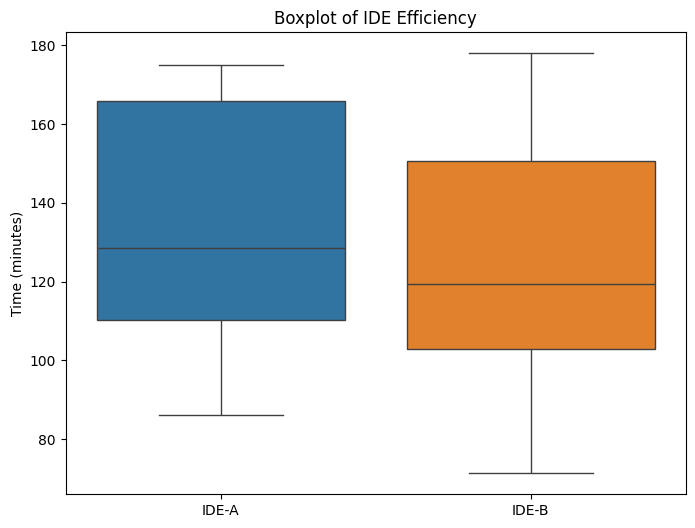

In [10]:
# Vizualisation of the data with boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['IDE_A_TIME','IDE_B_TIME']])
plt.xticks([0,1], ['IDE-A', 'IDE-B'])
plt.ylabel('Time (minutes)')
plt.title('Boxplot of IDE Efficiency')
plt.show()

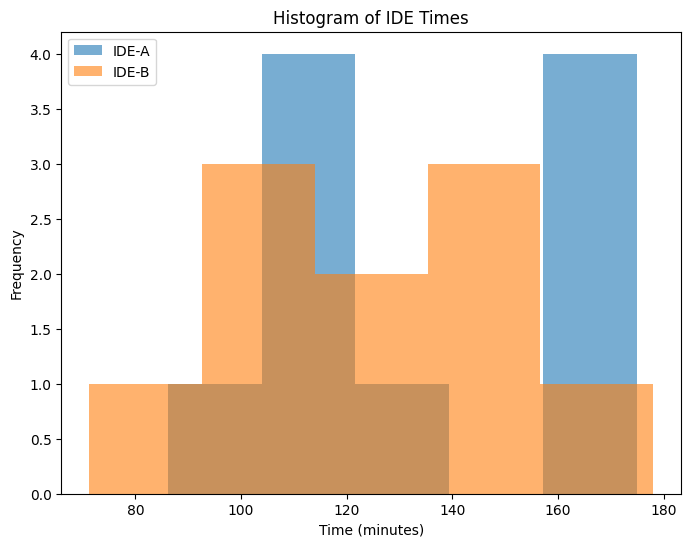

In [11]:
# Vizualisation of the data with histogram
plt.figure(figsize=(8,6))
plt.hist(df['IDE_A_TIME'], alpha=0.6, label='IDE-A', bins=5)
plt.hist(df['IDE_B_TIME'], alpha=0.6, label='IDE-B', bins=5)
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of IDE Times')
plt.legend()
plt.show()

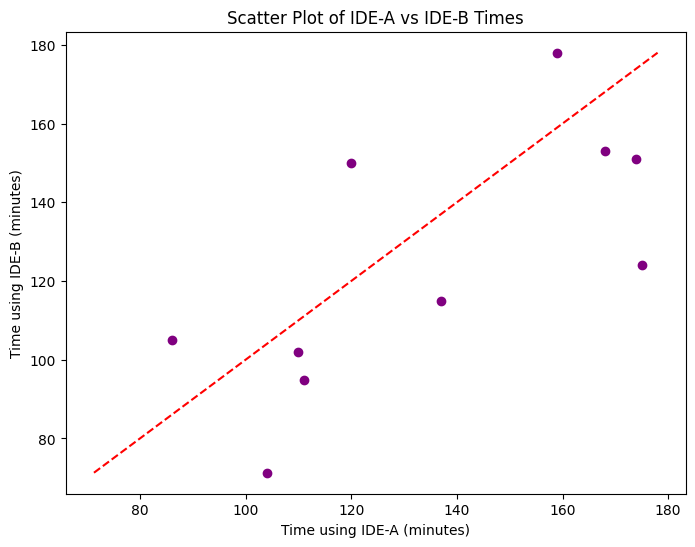

In [12]:
# Vizualisation of the data with Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['IDE_A_TIME'], df['IDE_B_TIME'], color='purple')
plt.plot([min(df['IDE_A_TIME'].min(), df['IDE_B_TIME'].min()),
          max(df['IDE_A_TIME'].max(), df['IDE_B_TIME'].max())],
         [min(df['IDE_A_TIME'].min(), df['IDE_B_TIME'].min()),
          max(df['IDE_A_TIME'].max(), df['IDE_B_TIME'].max())], 'r--')
plt.xlabel('Time using IDE-A (minutes)')
plt.ylabel('Time using IDE-B (minutes)')
plt.title('Scatter Plot of IDE-A vs IDE-B Times')
plt.show()